<a href="https://colab.research.google.com/github/studentrohman/Get_Publication_BPS/blob/master/bot_instagram_sekolah_stata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [0]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

In [0]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
def scroll(driver, timeout):
    scroll_pause_time = timeout

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            # If heights are the same it will exit the function
            break
        last_height = new_height

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromiu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


## Initializing WebDriver

In [0]:
driver.maximize_window()
driver.implicitly_wait(30)


In [0]:
!pip install instaloader

     |████████████████████████████████| 40kB 2.2MB/s 
  Created wheel for instaloader: filename=instaloader-4.3.2-cp36-none-any.whl size=43262 sha256=a79fb7bb080add179abb8cfc0da367544697a30d5fe4b4e0285692162f72c869
  Stored in directory: /root/.cache/pip/wheels/57/d5/89/9b681fb2d65c05392b430e7b950c2a72c54456dc51b7f93c12
Successfully built instaloader


In [0]:
import instaloader
L = instaloader.Instaloader()
L.login('studentrohman@gmail.com','28sarini1996')        # (login)



In [0]:

# Obtain profile metadata
profile = instaloader.Profile.from_username(L.context, "economicsugm")

# Print list of followees
follow_list = []
count=0
for followee in profile.get_followers():
    follow_list.append(followee.username)
    file = open("prada_followers.txt","a+")
    file.write(follow_list[count])
    file.write("\n")
    file.close()
    print(follow_list[count])
    count=count+1


In [0]:

# Obtain profile metadata
profile = instaloader.Profile.from_username(L.context, "sekolahstata")



# Print list of followees



follow_list = []
count=0
for followee in profile.get_followees():
    follow_list.append(followee.username)
    file = open("prada_followers.txt","a+")
    file.write(follow_list[count])
    file.write("\n")
    file.close()
    print(follow_list[count])
    count=count+1


In [0]:
for i in follow_list:
  unfollowHandle(i)

In [0]:
## Defining screenshot function
def screenCap():
    millis = int(round(time.time() * 1000))
    imgName=millis
    driver.save_screenshot("test"+str(imgName)+".png")
    img=mpimg.imread("test"+str(imgName)+".png")
    imgplot = plt.imshow(img)
    plt.show()

## 1.1 Logging into Instagram

In [0]:
import getpass
import requests
import pprint
import time

In [0]:
driver.get('https://www.instagram.com/accounts/login/?source=auth_switcher')

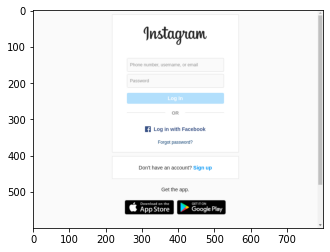

In [0]:
screenCap()

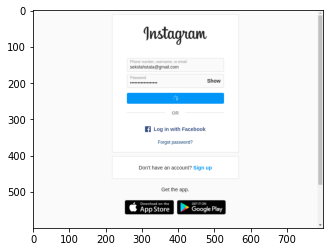

In [0]:
from selenium import webdriver
import time
user=driver.find_element_by_name("username")
user.send_keys("xxx@gmail.com")
passwd=driver.find_element_by_name("password")
passwd.send_keys("xxxx")
time.sleep(1)
button=driver.find_element_by_xpath("//*[text()='Log In']").click()
screenCap()

In [0]:
def unfollowWithUsername(username):
  driver.get('https://www.instagram.com/' + username + '/')
  time.sleep(2)
  followButton = driver.find_element_by_css_selector('button')
  if (followButton.text == 'Following'):
      followButton.click()
      time.sleep(2)
      confirmButton = driver.find_element_by_xpath('//button[text() = "Unfollow"]')
      confirmButton.click()
  else:
      print("You are not following this user")

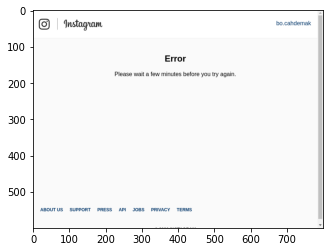

In [0]:
screenCap()

In [0]:
for i in follow_list:
  unfollowWithUsername(i)
  follow_list.remove(i)
  print('succces '+i)

In [0]:
def followWithUsername(username):
        driver.get('https://www.instagram.com/' + username + '/')
        time.sleep(2)
        followButton = driver.find_element_by_css_selector('button')
        if (followButton.text != 'Following'):
            followButton.click()
            time.sleep(2)
        else:
            print("You are already following this user + username")

In [0]:
for i in follow_list:
  followWithUsername(i)
  follow_list.remove(i)
  print('You are already following this user '+i)

## Notification warning Ignore

In [0]:
driver.find_element_by_xpath("//*[text()='Not Now']").click()

## 2.1 Search Account , Ex- Food for all food accounts
* This function will return all the account names from search results

In [0]:
def searchAndPrint(searchText):
    driver.find_element_by_xpath("//*[@placeholder='Search']").clear()
    driver.find_element_by_xpath("//*[@placeholder='Search']").send_keys(searchText)
    screenCap()
    time.sleep(1)
    ele=driver.find_element_by_xpath("//*[@class='fuqBx']")
    results=ele.find_elements_by_tag_name("a")
    l=[]
    for i in results:
        #Excluding Hashtags
        if "#" not in i.text:
            l.append(i.text.partition('\n')[0])
            print(i.text.partition('\n')[0],end=" , ")
            

## Calling searchAndPrint

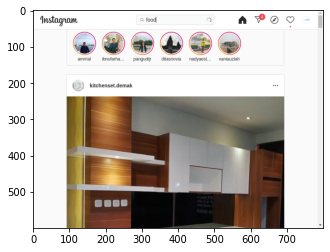

foodinsider , buzzfeedfood , jktfoodbang , foodbytania , dyodoran , foodnetwork , food , anitajoyo , cchannel_food_id , sibungbung , food.hits , Grand Edge Hotel & Food Arcade , bakudapan , foodizz.id , _sadfood , acalikesspicyfood , ladanglima.id , fooddays.id , worldfoodprogramme , ui.enak , mutiishungry , habisitubaik , gofoodindonesia , grabfoodid , ekidafoodjourney , fao , jktfooddestination , indozonefood , foodfighters.id , foodnusantara.id , anchorfp.id , foodmaxsby , folklig.id , aisyahfood.id , bandungfoodsociety , semarangfoodhunter , bondowosofoodies , foodbankid , foodjunctiongp , shazafood.id , hokifoods , foodymoodyviaa , primarasa.id , tokyofoodie , yusifadila96 , foodgallerybdg , watchfoodexplorer , foodgrapher_mks , sedaaappp , ojju.indo , asaff2020 , 

In [0]:
searchAndPrint("food")

## 3.1 Search And Open Any Profile 

In [0]:
def searchAndOpenProfile(profileName):
    driver.find_element_by_xpath("//*[@placeholder='Search']").clear()
    driver.find_element_by_xpath("//*[@placeholder='Search']").send_keys(profileName)
    time.sleep(3)
    ele=driver.find_element_by_xpath("//*[@class='fuqBx']")
    results=ele.find_elements_by_tag_name("a")
    for i in results:
        if "#" not in i.text:
            i.click()
            print(i.text.partition('\n')[0]+" Profile Opened")
            plt.show()
            break;
    

In [0]:
# Sample run on So delhi
searchAndOpenProfile("depie_febui")

depie_febui Profile Opened


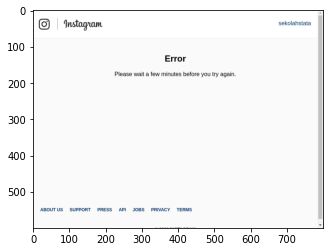

In [0]:
screenCap()

## 4.1-2 Follow Handle

In [0]:
def followHandle(handleName):
    driver.get("https://www.instagram.com")
    searchAndOpenProfile(handleName)
    time.sleep(1)
    ## To verify whether an element exists or not , ie follow button, if exists then click
    if len(driver.find_elements_by_xpath("//*[text()='Follow']"))>0:
        driver.find_element_by_xpath("//*[text()='Follow']").click()
        print("Started following the Handle")
    else:
        print("Already following this handle")

In [0]:
for i in follow_list:
  followHandle(i)

## 4.1-3 Unfollow Handle

In [0]:
def unfollowHandle(handleName):
    driver.get("https://www.instagram.com")
    searchAndOpenProfile(handleName)
    time.sleep(1)
    ## To verify whether an element exists or not 
    driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/div[1]/div[2]/span/span[1]/button').click()
    if len(driver.find_elements_by_xpath("//*[text()='Follow']"))==0:
        driver.find_element_by_xpath("//*[text()='Unfollow']").click()
        print("Unfollowed the Handle")
    else:
        print("Handle is already unfollowed")

In [0]:
for i in follow_list:
  unfollowHandle(i)
  follow_list.remove(i)

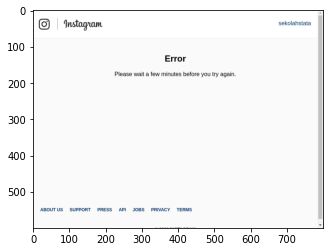

In [0]:
screenCap()

In [0]:
follow_list.remove('dinasbl')

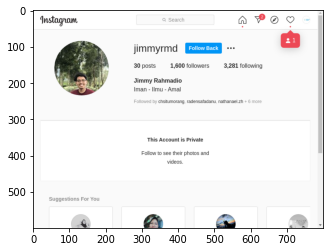

In [0]:
screenCap()

## 5.1 Like n number of Posts of Any Handle

In [0]:
def likePosts(handleName,numberOfPosts):
    driver.get("https://www.instagram.com")
    searchAndOpenProfile(handleName)
    time.sleep(3)
    driver.find_element_by_class_name("_9AhH0").click()
    ## To verify whether an element exists or not 
    if len(driver.find_elements_by_xpath("//span[@aria-label='Like']"))>0:
        driver.find_element_by_xpath("//span[@aria-label='Like']").click()
        print("Post number 1 liked")
        screenCap()
        
    else:
        print("Post number 1 is already liked")
        #Screenshot on 1st post
        screenCap()
    # For rest of the posts
    for i in range(numberOfPosts-1):
        if len(driver.find_elements_by_xpath("//*[text()='Next']"))>0:
            driver.find_element_by_xpath("//*[text()='Next']").click()
            time.sleep(2)
            if len(driver.find_elements_by_xpath("//span[@aria-label='Like']"))>0:
                time.sleep(1)
                driver.find_element_by_xpath("//span[@aria-label='Like']").click()
                print("Post number "+str(i+2)+" liked")
            else:
                print("Post number "+str(i+2)+" is already liked")
        else:
            break
    time.sleep(2)
    driver.find_element_by_xpath("//*[text()='Close']").click()
    

In [0]:
likePosts("rohman_attaslim",10)

## 5.2 Unlike n number of Posts of Any Handle

In [0]:
def unlikePosts(handleName,numberOfPosts):
    driver.get("https://www.instagram.com")
    searchAndOpenProfile(handleName)
    time.sleep(3)
    driver.find_element_by_class_name("_9AhH0").click()
    if len(driver.find_elements_by_xpath("//span[@aria-label='Unlike']"))>0:
        driver.find_element_by_xpath("//span[@aria-label='Unlike']").click()
        print("Post number 1 unliked")
    else:
        print("Post number 1 is already unliked")
    for i in range(numberOfPosts-1):
        if len(driver.find_elements_by_xpath("//*[text()='Next']"))>0:
            driver.find_element_by_xpath("//*[text()='Next']").click()
            time.sleep(2)
            if len(driver.find_elements_by_xpath("//span[@aria-label='Unlike']"))>0:
                driver.find_element_by_xpath("//span[@aria-label='Unlike']").click()
                print("Post number "+str(i+2)+" unliked")
            else:
                print("Post number "+str(i+2)+" is already unliked")
        else:
            break
    time.sleep(1)
    driver.find_element_by_xpath("//*[text()='Close']").click()
    

In [0]:
unlikePosts("soumyansh gupta",28)

## 6.1 Extract followers of any account

In [0]:
def followersList(handleName,numberOfFollowers):
    driver.get("https://www.instagram.com")
    searchAndOpenProfile(handleName)
    time.sleep(1)
    handle='/'+handleName+'/followers/'
    # Making dynamic xpath
    xpath="//*[@href='"+handle+"'"+']' 
    driver.find_element_by_xpath(xpath).click()
    time.sleep(2)
    i=0
    j=0
    while i<=numberOfFollowers+j:
        time.sleep(1)
        element=driver.find_element_by_xpath("//*[@class='PZuss']")
        results=element.find_elements_by_tag_name("a")
        
        x=[]
        for k in results:
            if k.text.strip()!='':
                x.append(k.text.strip())
        
        if (len(x)<numberOfFollowers):
            followerWindow = driver.find_element_by_xpath("//*[@class='isgrP']")
            elements=followerWindow.find_elements_by_tag_name("a")
            driver.execute_script("arguments[0].scrollIntoView();", elements[i])
            i=i+1
            j=j+1
        else:
        
            element_new=driver.find_element_by_xpath("//*[@class='PZuss']")
            results_new=element.find_elements_by_tag_name("a")
            l=[]
            count=0
            for r in results_new:
                if r.text.strip()!='':
                    count=count+1
                    l.append(r.text.strip())
                    if count==numberOfFollowers:
                        break
            print(l)
            break
                
        

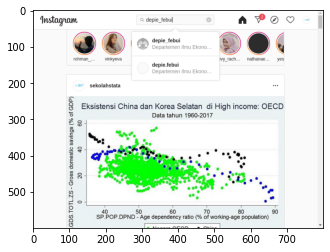

depie_febui Profile Opened
['cutaryuliska', 'bayyupratama_', 'scharkawie', 'rayyannaga', 'lupittadya', 'hawari_nainggolan', 'rendi_jogja', 'mrznof', 'billy.tulungen', 'mulyadi.0397', 'angelinaasnun', 'rsmarthut_', 'nipalififi', 'guguyu88', 'mitazizahp', 'ikhsanifirdaus17', 'pkepk_feb_ub', 'sebtryna_eva', 'setengahbaal', 'chsitumorang', 'raikainstitute', 'markdennies345', 'haveanicedaybby', 'srinur_ainingsih', 'aritriharyanto', 'ghazawan_rahman', 'rajinmembacaberita', 'syifanur980', 'gusmos05', 'endangyuliatisw', 'vinkyeva', 'xarstx', 'budakmecin', 'sekolahstata', 'ronaldsmh', 'abdurrahmanregi', 'estianarusmawati', 'tasyaaw___', 'coffee_pak_leman_aceh_gayo', 'denardth', 'ohninabobooh', 'picsweeteinstein', 'suhaileresmair', 'cllmbbywu', 'pesma_mutiara_bangsa', 'jastipbbw.surabaya', 'laskar_puoma_fiysabiylillah', 'hartonowidjaja_inst', 'ndrahmi', 'citralogy', 'indra_permadi', 'etaniaandhika', 'eksacta_', 'mhmd.rifkifadilah', 'alhaarkan', 'ellensaeltzer', 'huriyatul_akmal', 'dilyasak', 'mu

In [0]:
followersList("depie_febui",100)

## 6.2 Followers of any Handle that you are following but those who don't follow you

In [0]:
def followUnfollow(ownHandleName,handleName):
    # List of your own followers
    driver.get("https://www.instagram.com")
    driver.find_element_by_xpath("//*[@aria-label='Profile']").click()
    time.sleep(3)
    handle='/'+ownHandleName+'/followers/'
    xpath="//*[@href='"+handle+"'"+']' 
    driver.find_element_by_xpath(xpath).click()
    time.sleep(2)
    element=driver.find_element_by_xpath("//*[@class='PZuss']")
    results=element.find_elements_by_tag_name("a")    
    x=[]
    for k in results:
        if k.text.strip()!='':
            x.append(k.text.strip())
    print("Your followers are ",x)
    
    # Extracting List of followers of given Handle which are getting followed by you
    time.sleep(2)
    driver.get("https://www.instagram.com")
    time.sleep(2)
    searchAndOpenProfile(handleName)
    handle='/'+handleName+'/followers/'
    xpath="//*[@href='"+handle+"'"+']' 
    driver.find_element_by_xpath(xpath).click()
    time.sleep(2)
    elements_new=driver.find_elements_by_xpath("//*[text()='Following']/../..")
    l=[]
    for j in elements_new:
        if j.text.strip()!='':
            l.append(j.text.split()[0].strip())
    print(handleName+" followers which are getting followed by you are ",l)
    followUnfollow_List=[]
    for i in l:
        if i not in x:
            followUnfollow_List.append(i)
    print("Followers of "+handleName+" that you are following but those who don't follow you are \n",followUnfollow_List)
        

In [0]:
followUnfollow("sekolahstata","depie_febui")

NoSuchElementException: ignored

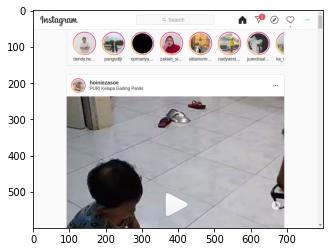

In [0]:
screenCap()

## 7. Story Viewer

In [0]:
def storyViewer(handleName):
    driver.get("https://www.instagram.com")
    time.sleep(3)
    searchAndOpenProfile(handleName)
    time.sleep(3)
    story=driver.find_element_by_class_name("CfWVH")
    
    if int(story.get_attribute("height"))==166:
        print("You have already seen the story")
    else:
        driver.find_element_by_class_name("_6q-tv").click()
        if(len(driver.find_elements_by_xpath("//*[text()='Close']"))>0):
            print("Viewing the story")
            time.sleep(2)
            screenCap()
        else:
            print("User has no story")

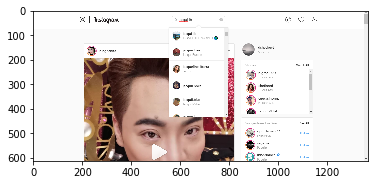

jacqui_ib Profile Opened
166
You have already seen the story


In [0]:
storyViewer("jacqui_ib")